# Лабораторная работа №1: Проведение исследований с алгоритмом KNN

Начнем с импорта необходимых библиотек


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, classification_report, mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)



## Выбор набора данных для задачи классификации
Этот датасет используется для предсказания дохода человека (<=50K или >50K)

Практическая задача: определение уровня дохода на основе демографических и профессиональных характеристик

Применение: кредитный скоринг, маркетинг, социальные исследования

In [27]:
df_classification = pd.read_csv('adult.csv')
print("Форма датасета:", df_classification.shape)
print("\nПервые 5 строк:")
df_classification.head()

Форма датасета: (32561, 15)

Первые 5 строк:


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


## Просмотр информации о датасете: типы данных, наличие пропусков

In [28]:
print("Информация о датасете:")
print(df_classification.info())
print("\nСтатистика по числовым признакам:")
print(df_classification.describe())



Информация о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None

Статистика по числовым признакам:
                age        fnl

## Проверка распределения целевой переменной (классов)

In [29]:
print("Распределение целевой переменной 'income':")
print(df_classification['income'].value_counts())
print("\nПроцентное соотношение:")
print(df_classification['income'].value_counts(normalize=True) * 100)



Распределение целевой переменной 'income':
income
<=50K    24720
>50K      7841
Name: count, dtype: int64

Процентное соотношение:
income
<=50K    75.919044
>50K     24.080956
Name: proportion, dtype: float64


## Выбор набора данных для задачи регрессии
 Этот датасет используется для предсказания возраста окаменелостей на основе геологических и изотопных данных

Практическая задача: определение возраста окаменелостей для палеонтологических исследований

Применение: геология, палеонтология, археология, датирование образцов


In [30]:
df_train_regression = pd.read_csv('train_data.csv')
df_test_regression = pd.read_csv('test_data.csv')

print("Форма обучающего датасета:", df_train_regression.shape)
print("Форма тестового датасета:", df_test_regression.shape)
print("\nПервые 5 строк обучающего датасета:")
df_train_regression.head()



Форма обучающего датасета: (4398, 13)
Форма тестового датасета: (1100, 13)

Первые 5 строк обучающего датасета:


,uranium_lead_ratio,carbon_14_ratio,radioactive_decay_series,stratigraphic_layer_depth,geological_period,paleomagnetic_data,inclusion_of_other_fossils,isotopic_composition,surrounding_rock_type,stratigraphic_position,fossil_size,fossil_weight,age
0,0.738061,0.487707,0.907884,91.17,Cretaceous,Normal polarity,False,0.915951,Conglomerate,Middle,50.65,432.00,43523
1,0.560096,0.341738,1.121302,165.44,Cambrian,Normal polarity,False,0.803968,Limestone,Top,48.85,353.29,44112
2,0.424773,0.218493,0.103855,218.98,Cambrian,Normal polarity,True,0.792441,Shale,Bottom,37.66,371.33,43480
3,0.349958,0.704649,0.383617,51.09,Permian,Normal polarity,True,0.074636,Limestone,Bottom,39.10,232.84,30228
4,0.886811,0.777494,0.593254,313.72,Devonian,Normal polarity,True,1.646640,Shale,Top,90.84,277.67,67217


## Просмотр информации о датасетах регрессии


In [31]:
print("Информация об обучающем датасете:")
print(df_train_regression.info())
print("\nСтатистика по числовым признакам обучающего датасета:")
print(df_train_regression.describe())



Информация об обучающем датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   uranium_lead_ratio          4398 non-null   float64
 1   carbon_14_ratio             4398 non-null   float64
 2   radioactive_decay_series    4398 non-null   float64
 3   stratigraphic_layer_depth   4398 non-null   float64
 4   geological_period           4398 non-null   object 
 5   paleomagnetic_data          4398 non-null   object 
 6   inclusion_of_other_fossils  4398 non-null   bool   
 7   isotopic_composition        4398 non-null   float64
 8   surrounding_rock_type       4398 non-null   object 
 9   stratigraphic_position      4398 non-null   object 
 10  fossil_size                 4398 non-null   float64
 11  fossil_weight               4398 non-null   float64
 12  age                         4398 non-null   int64  
dtyp

## Проверка распределения целевой переменной (возраст окаменелости)


Статистика по целевой переменной 'age':
count      4398.000000
mean      40586.656435
std       15200.700905
min        4208.000000
25%       29766.250000
50%       39567.000000
75%       50550.500000
max      103079.000000
Name: age, dtype: float64

Гистограмма распределения возраста:


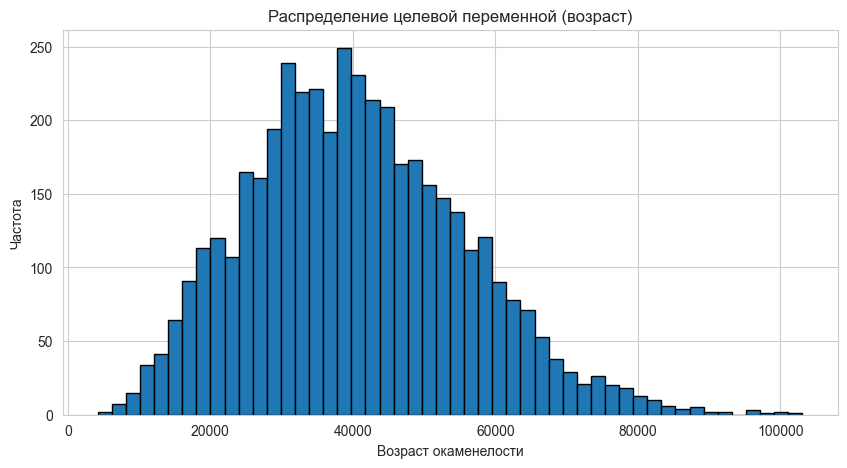

In [32]:
print("Статистика по целевой переменной 'age':")
print(df_train_regression['age'].describe())
print("\nГистограмма распределения возраста:")
plt.figure(figsize=(10, 5))
plt.hist(df_train_regression['age'], bins=50, edgecolor='black')
plt.xlabel('Возраст окаменелости')
plt.ylabel('Частота')
plt.title('Распределение целевой переменной (возраст)')
plt.show()



## Выбор метрик качества

**Для задачи классификации:**
- **Accuracy (Точность)**
- **F1-score**

**Для задачи регрессии:**
- **MSE (Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Коэффициент детерминации)**


## Создание бейзлайна и оценка качества для классификации


In [33]:
df_clf = df_classification.copy()

X_clf = df_clf.drop('income', axis=1)
y_clf = df_clf['income']
X_clf_train, X_clf_test, y_clf_train, y_clf_test = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf
)

print(f"Размер обучающей выборки: {X_clf_train.shape}")
print(f"Размер тестовой выборки: {X_clf_test.shape}")



Размер обучающей выборки: (26048, 14)
Размер тестовой выборки: (6513, 14)


## Предобработка данных для классификации(LabelEncoder, масштабирование признаков, замена пропущенных значений)


In [34]:
numeric_cols_clf = X_clf_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_clf = X_clf_train.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numeric_cols_clf)
print("Категориальные признаки:", categorical_cols_clf)

label_encoders_clf = {}
X_clf_train_encoded = X_clf_train.copy()
X_clf_test_encoded = X_clf_test.copy()

for col in categorical_cols_clf:
    le = LabelEncoder()
    X_clf_train_encoded[col] = X_clf_train_encoded[col].replace('?', 'Unknown')
    X_clf_test_encoded[col] = X_clf_test_encoded[col].replace('?', 'Unknown')
    X_clf_train_encoded[col] = le.fit_transform(X_clf_train_encoded[col].astype(str))
    X_clf_test_encoded[col] = le.fit_transform(X_clf_test_encoded[col].astype(str))
    label_encoders_clf[col] = le

scaler_clf = StandardScaler()
X_clf_train_scaled = X_clf_train_encoded.copy()
X_clf_test_scaled = X_clf_test_encoded.copy()

X_clf_train_scaled[numeric_cols_clf] = scaler_clf.fit_transform(X_clf_train_encoded[numeric_cols_clf])
X_clf_test_scaled[numeric_cols_clf] = scaler_clf.transform(X_clf_test_encoded[numeric_cols_clf])



Числовые признаки: ['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']
Категориальные признаки: ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country']


## Обучение модели классификации (бейзлайн)


In [35]:

knn_clf_baseline = KNeighborsClassifier(n_neighbors=5, weights='uniform')

knn_clf_baseline.fit(X_clf_train_scaled, y_clf_train)

y_clf_pred_baseline = knn_clf_baseline.predict(X_clf_test_scaled)




## Оценка качества модели классификации по выбранным метрикам


In [36]:
accuracy_clf_baseline = accuracy_score(y_clf_test, y_clf_pred_baseline)

f1_clf_baseline = f1_score(y_clf_test, y_clf_pred_baseline, pos_label='>50K')

print("Результаты бейзлайн модели для классификации:")
print(f"Accuracy: {accuracy_clf_baseline:.4f}")
print(f"F1-score: {f1_clf_baseline:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_baseline))



Результаты бейзлайн модели для классификации:
Accuracy: 0.8233
F1-score: 0.6060

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4945
        >50K       0.65      0.56      0.61      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.73      0.75      6513
weighted avg       0.82      0.82      0.82      6513



## Подготовка данных для задачи регрессии


In [37]:

X_reg_train = df_train_regression.drop('age', axis=1)
y_reg_train = df_train_regression['age']

X_reg_test = df_test_regression.drop('age', axis=1)
y_reg_test = df_test_regression['age']

print(f"Размер обучающей выборки: {X_reg_train.shape}")
print(f"Размер тестовой выборки: {X_reg_test.shape}")



Размер обучающей выборки: (4398, 12)
Размер тестовой выборки: (1100, 12)


## Предобработка данных для регрессии (делаю тоже самое что и для классификации


In [38]:
numeric_cols_reg = X_reg_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols_reg = X_reg_train.select_dtypes(include=['object']).columns.tolist()

print("Числовые признаки:", numeric_cols_reg)
print("Категориальные признаки:", categorical_cols_reg)
label_encoders_reg = {}
X_reg_train_encoded = X_reg_train.copy()
X_reg_test_encoded = X_reg_test.copy()

for col in categorical_cols_reg:
    le = LabelEncoder()
    X_reg_train_encoded[col] = X_reg_train_encoded[col].fillna('Unknown')
    X_reg_test_encoded[col] = X_reg_test_encoded[col].fillna('Unknown')
    X_reg_train_encoded[col] = le.fit_transform(X_reg_train_encoded[col].astype(str))
    X_reg_test_encoded[col] = le.transform(X_reg_test_encoded[col].astype(str))
    label_encoders_reg[col] = le

scaler_reg = StandardScaler()
X_reg_train_scaled = X_reg_train_encoded.copy()
X_reg_test_scaled = X_reg_test_encoded.copy()

X_reg_train_scaled[numeric_cols_reg] = scaler_reg.fit_transform(X_reg_train_encoded[numeric_cols_reg])
X_reg_test_scaled[numeric_cols_reg] = scaler_reg.transform(X_reg_test_encoded[numeric_cols_reg])



Числовые признаки: ['uranium_lead_ratio', 'carbon_14_ratio', 'radioactive_decay_series', 'stratigraphic_layer_depth', 'isotopic_composition', 'fossil_size', 'fossil_weight']
Категориальные признаки: ['geological_period', 'paleomagnetic_data', 'surrounding_rock_type', 'stratigraphic_position']


## Обучение модели регрессии (бейзлайн)


In [39]:
knn_reg_baseline = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_reg_baseline.fit(X_reg_train_scaled, y_reg_train)
y_reg_pred_baseline = knn_reg_baseline.predict(X_reg_test_scaled)



## Оценка качества модели регрессии по выбранным метрикам


In [40]:
mse_reg_baseline = mean_squared_error(y_reg_test, y_reg_pred_baseline)

mae_reg_baseline = mean_absolute_error(y_reg_test, y_reg_pred_baseline)
r2_reg_baseline = r2_score(y_reg_test, y_reg_pred_baseline)

print("Результаты бейзлайн модели для регрессии:")
print(f"MSE: {mse_reg_baseline:.2f}")
print(f"MAE: {mae_reg_baseline:.2f}")
print(f"R²: {r2_reg_baseline:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_baseline):.2f}")



Результаты бейзлайн модели для регрессии:
MSE: 43776838.05
MAE: 5159.79
R²: 0.8198
RMSE (корень из MSE): 6616.41


## Формулирование гипотез для улучшения

### Гипотезы для улучшения качества моделей:

1. **Препроцессинг данных:**
   - Обработка пропусков значений
   - Нормализация/стандартизация признаков (уже применена)
   - Обработка выбросов

2. **Визуализация данных:**
   - Анализ распределений признаков
   - Корреляционный анализ
   - Анализ важности признаков

3. **Формирование новых признаков:**
   - Создание комбинаций признаков
   - Полиномиальные признаки
   - Биннинг числовых признаков

4. **Подбор гиперпараметров:**
   - Оптимальное количество соседей (k)
   - Выбор метрики расстояния (euclidean, manhattan, minkowski)
   - Выбор весов (uniform, distance)
   - Использование кросс-валидации для выбора параметров


## Проверка гипотез - Препроцессинг данных

### Обработка выбросов для классификации


In [41]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

outliers_info = {}
for col in numeric_cols_clf:
    outliers = detect_outliers_iqr(X_clf_train[col])
    outliers_info[col] = outliers.sum()
    print(f"{col}: {outliers.sum()} выбросов ({outliers.sum()/len(X_clf_train)*100:.2f}%)")

X_clf_train_no_outliers = X_clf_train_encoded.copy()
X_clf_test_no_outliers = X_clf_test_encoded.copy()

for col in numeric_cols_clf:
    if outliers_info[col] > len(X_clf_train) * 0.05:
        Q1 = X_clf_train[col].quantile(0.25)
        Q3 = X_clf_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        X_clf_train_no_outliers[col] = X_clf_train_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)
        X_clf_test_no_outliers[col] = X_clf_test_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

scaler_clf_no_out = StandardScaler()
X_clf_train_no_out_scaled = X_clf_train_no_outliers.copy()
X_clf_test_no_out_scaled = X_clf_test_no_outliers.copy()

X_clf_train_no_out_scaled[numeric_cols_clf] = scaler_clf_no_out.fit_transform(X_clf_train_no_outliers[numeric_cols_clf])
X_clf_test_no_out_scaled[numeric_cols_clf] = scaler_clf_no_out.transform(X_clf_test_no_outliers[numeric_cols_clf])

print("\nОбработка выбросов завершена!")

age: 200 выбросов (0.77%)
fnlwgt: 774 выбросов (2.97%)
education.num: 967 выбросов (3.71%)
capital.gain: 2179 выбросов (8.37%)
capital.loss: 1232 выбросов (4.73%)
hours.per.week: 7199 выбросов (27.64%)

Обработка выбросов завершена!


In [42]:
knn_clf_no_outliers = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_clf_no_outliers.fit(X_clf_train_no_out_scaled, y_clf_train)
y_clf_pred_no_outliers = knn_clf_no_outliers.predict(X_clf_test_no_out_scaled)

accuracy_clf_no_outliers = accuracy_score(y_clf_test, y_clf_pred_no_outliers)
f1_clf_no_outliers = f1_score(y_clf_test, y_clf_pred_no_outliers, pos_label='>50K')

print("Результаты модели с обработкой выбросов:")
print(f"Accuracy: {accuracy_clf_no_outliers:.4f}")
print(f"F1-score: {f1_clf_no_outliers:.4f}")
print(f"\nСравнение с бейзлайном:")
print(f"Accuracy: {accuracy_clf_baseline:.4f} -> {accuracy_clf_no_outliers:.4f} (изменение: {(accuracy_clf_no_outliers-accuracy_clf_baseline)*100:+.2f}%)")
print(f"F1-score: {f1_clf_baseline:.4f} -> {f1_clf_no_outliers:.4f} (изменение: {(f1_clf_no_outliers-f1_clf_baseline)*100:+.2f}%)")

if accuracy_clf_no_outliers > accuracy_clf_baseline:
    print("\n✓ Гипотеза подтверждена: обработка выбросов улучшила качество")
else:
    print("\n✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество")

Результаты модели с обработкой выбросов:
Accuracy: 0.8107
F1-score: 0.5861

Сравнение с бейзлайном:
Accuracy: 0.8233 -> 0.8107 (изменение: -1.26%)
F1-score: 0.6060 -> 0.5861 (изменение: -1.99%)

✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество


### Формирование новых признаков для классификации


In [43]:
from sklearn.preprocessing import PolynomialFeatures

important_features = ['age', 'hours.per.week', 'education.num']
important_indices = [numeric_cols_clf.index(f) for f in important_features if f in numeric_cols_clf]

poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
X_clf_train_poly = X_clf_train_scaled.copy()
X_clf_test_poly = X_clf_test_scaled.copy()

if len(important_indices) > 0:
    X_important_train = X_clf_train_scaled.iloc[:, important_indices]
    X_important_test = X_clf_test_scaled.iloc[:, important_indices]
    
    X_poly_train = poly.fit_transform(X_important_train)
    X_poly_test = poly.transform(X_important_test)
    
    X_clf_train_poly = np.hstack([X_clf_train_scaled.values, X_poly_train[:, len(important_indices):]])
    X_clf_test_poly = np.hstack([X_clf_test_scaled.values, X_poly_test[:, len(important_indices):]])
    
    print(f"Добавлено {X_poly_train.shape[1] - len(important_indices)} новых полиномиальных признаков")
    print(f"Общее количество признаков: {X_clf_train_poly.shape[1]}")
else:
    X_clf_train_poly = X_clf_train_scaled.values
    X_clf_test_poly = X_clf_test_scaled.values

Добавлено 3 новых полиномиальных признаков
Общее количество признаков: 17


In [44]:
knn_clf_poly = KNeighborsClassifier(n_neighbors=5, weights='uniform')
knn_clf_poly.fit(X_clf_train_poly, y_clf_train)
y_clf_pred_poly = knn_clf_poly.predict(X_clf_test_poly)

accuracy_clf_poly = accuracy_score(y_clf_test, y_clf_pred_poly)
f1_clf_poly = f1_score(y_clf_test, y_clf_pred_poly, pos_label='>50K')

print("Результаты модели с полиномиальными признаками:")
print(f"Accuracy: {accuracy_clf_poly:.4f}")
print(f"F1-score: {f1_clf_poly:.4f}")
print(f"\nСравнение с бейзлайном:")
print(f"Accuracy: {accuracy_clf_baseline:.4f} -> {accuracy_clf_poly:.4f} (изменение: {(accuracy_clf_poly-accuracy_clf_baseline)*100:+.2f}%)")
print(f"F1-score: {f1_clf_baseline:.4f} -> {f1_clf_poly:.4f} (изменение: {(f1_clf_poly-f1_clf_baseline)*100:+.2f}%)")

if accuracy_clf_poly > accuracy_clf_baseline:
    print("\n✓ Гипотеза подтверждена: полиномиальные признаки улучшили качество")
else:
    print("\n✗ Гипотеза не подтверждена: полиномиальные признаки не улучшили качество")

Результаты модели с полиномиальными признаками:
Accuracy: 0.8179
F1-score: 0.5916

Сравнение с бейзлайном:
Accuracy: 0.8233 -> 0.8179 (изменение: -0.54%)
F1-score: 0.6060 -> 0.5916 (изменение: -1.44%)

✗ Гипотеза не подтверждена: полиномиальные признаки не улучшили качество


### Итоговая оценка гипотез для классификации


Сравнение результатов проверки гипотез для классификации:
               Гипотеза  Accuracy  F1-score
               Бейзлайн  0.823277  0.605957
     Обработка выбросов  0.810686  0.586103
Полиномиальные признаки  0.817903  0.591598

Лучшая гипотеза: Бейзлайн
Лучший Accuracy: 0.8233
Лучший F1-score: 0.6060


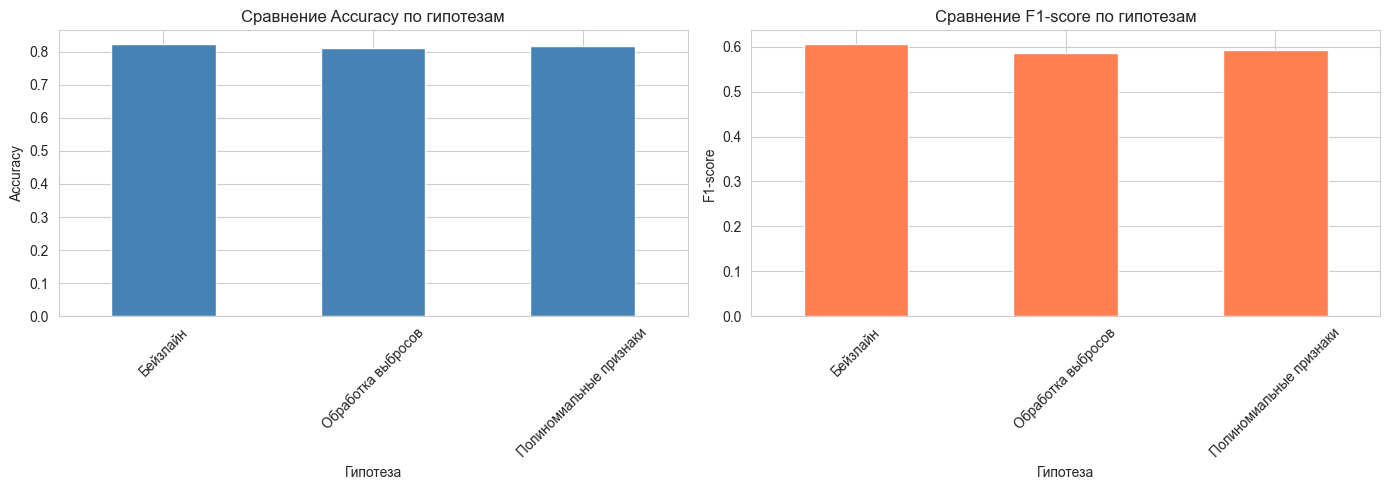

In [45]:
hypothesis_results_clf = pd.DataFrame({
    'Гипотеза': ['Бейзлайн', 'Обработка выбросов', 'Полиномиальные признаки'],
    'Accuracy': [accuracy_clf_baseline, accuracy_clf_no_outliers, accuracy_clf_poly],
    'F1-score': [f1_clf_baseline, f1_clf_no_outliers, f1_clf_poly]
})

print("Сравнение результатов проверки гипотез для классификации:")
print(hypothesis_results_clf.to_string(index=False))

best_idx = hypothesis_results_clf['F1-score'].idxmax()
best_hypothesis = hypothesis_results_clf.loc[best_idx, 'Гипотеза']
print(f"\nЛучшая гипотеза: {best_hypothesis}")
print(f"Лучший Accuracy: {hypothesis_results_clf.loc[best_idx, 'Accuracy']:.4f}")
print(f"Лучший F1-score: {hypothesis_results_clf.loc[best_idx, 'F1-score']:.4f}")

fig, axes = plt.subplots(1, 2, figsize=(14, 5))
hypothesis_results_clf.plot(x='Гипотеза', y='Accuracy', kind='bar', ax=axes[0], color='steelblue')
axes[0].set_title('Сравнение Accuracy по гипотезам')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend().remove()

hypothesis_results_clf.plot(x='Гипотеза', y='F1-score', kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Сравнение F1-score по гипотезам')
axes[1].set_ylabel('F1-score')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend().remove()

plt.tight_layout()
plt.show()

### Проверка гипотез для регрессии


In [46]:
outliers_info_reg = {}
for col in numeric_cols_reg:
    outliers = detect_outliers_iqr(X_reg_train[col])
    outliers_info_reg[col] = outliers.sum()
    print(f"{col}: {outliers.sum()} выбросов ({outliers.sum()/len(X_reg_train)*100:.2f}%)")

X_reg_train_no_outliers = X_reg_train_encoded.copy()
X_reg_test_no_outliers = X_reg_test_encoded.copy()

for col in numeric_cols_reg:
    if outliers_info_reg[col] > len(X_reg_train) * 0.05:
        Q1 = X_reg_train[col].quantile(0.25)
        Q3 = X_reg_train[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        X_reg_train_no_outliers[col] = X_reg_train_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)
        X_reg_test_no_outliers[col] = X_reg_test_no_outliers[col].clip(lower=lower_bound, upper=upper_bound)

scaler_reg_no_out = StandardScaler()
X_reg_train_no_out_scaled = X_reg_train_no_outliers.copy()
X_reg_test_no_out_scaled = X_reg_test_no_outliers.copy()

X_reg_train_no_out_scaled[numeric_cols_reg] = scaler_reg_no_out.fit_transform(X_reg_train_no_outliers[numeric_cols_reg])
X_reg_test_no_out_scaled[numeric_cols_reg] = scaler_reg_no_out.transform(X_reg_test_no_outliers[numeric_cols_reg])

print("\nОбработка выбросов для регрессии завершена!")

uranium_lead_ratio: 13 выбросов (0.30%)
carbon_14_ratio: 0 выбросов (0.00%)
radioactive_decay_series: 19 выбросов (0.43%)
stratigraphic_layer_depth: 23 выбросов (0.52%)
isotopic_composition: 18 выбросов (0.41%)
fossil_size: 15 выбросов (0.34%)
fossil_weight: 19 выбросов (0.43%)

Обработка выбросов для регрессии завершена!


In [47]:
knn_reg_no_outliers = KNeighborsRegressor(n_neighbors=5, weights='uniform')
knn_reg_no_outliers.fit(X_reg_train_no_out_scaled, y_reg_train)
y_reg_pred_no_outliers = knn_reg_no_outliers.predict(X_reg_test_no_out_scaled)

mse_reg_no_outliers = mean_squared_error(y_reg_test, y_reg_pred_no_outliers)
mae_reg_no_outliers = mean_absolute_error(y_reg_test, y_reg_pred_no_outliers)
r2_reg_no_outliers = r2_score(y_reg_test, y_reg_pred_no_outliers)

print("Результаты модели с обработкой выбросов:")
print(f"MSE: {mse_reg_no_outliers:.2f}")
print(f"MAE: {mae_reg_no_outliers:.2f}")
print(f"R²: {r2_reg_no_outliers:.4f}")
print(f"\nСравнение с бейзлайном:")
print(f"MSE: {mse_reg_baseline:.2f} -> {mse_reg_no_outliers:.2f} (изменение: {(mse_reg_no_outliers-mse_reg_baseline)/mse_reg_baseline*100:+.2f}%)")
print(f"R²: {r2_reg_baseline:.4f} -> {r2_reg_no_outliers:.4f} (изменение: {(r2_reg_no_outliers-r2_reg_baseline)*100:+.2f}%)")

if mse_reg_no_outliers < mse_reg_baseline:
    print("\n✓ Гипотеза подтверждена: обработка выбросов улучшила качество")
else:
    print("\n✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество")

Результаты модели с обработкой выбросов:
MSE: 43776838.05
MAE: 5159.79
R²: 0.8198

Сравнение с бейзлайном:
MSE: 43776838.05 -> 43776838.05 (изменение: +0.00%)
R²: 0.8198 -> 0.8198 (изменение: +0.00%)

✗ Гипотеза не подтверждена: обработка выбросов не улучшила качество


## Проверка гипотез - Визуализация данных для классификации


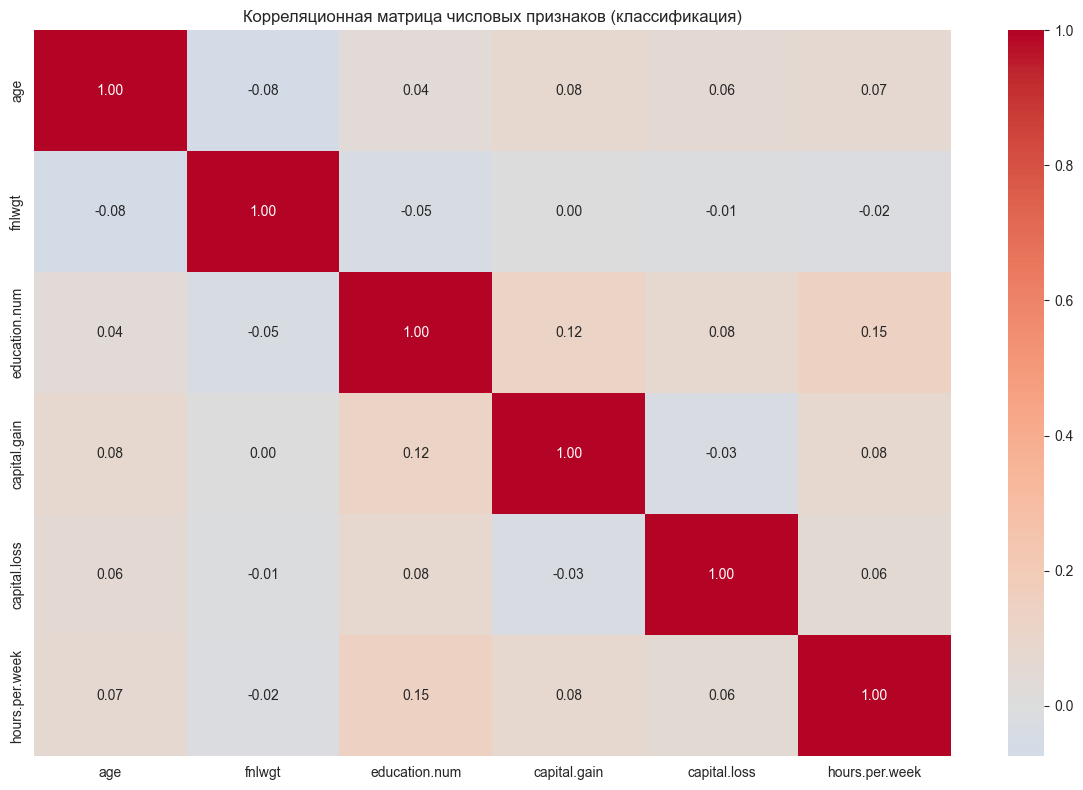

In [48]:
numeric_data_clf = X_clf_train_scaled[numeric_cols_clf]
correlation_matrix = numeric_data_clf.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица числовых признаков (классификация)')
plt.tight_layout()
plt.show()



## Визуализация распределения важных признаков относительно целевой переменной(анализ признаков 'age' и 'hours.per.week' в зависимости от дохода)


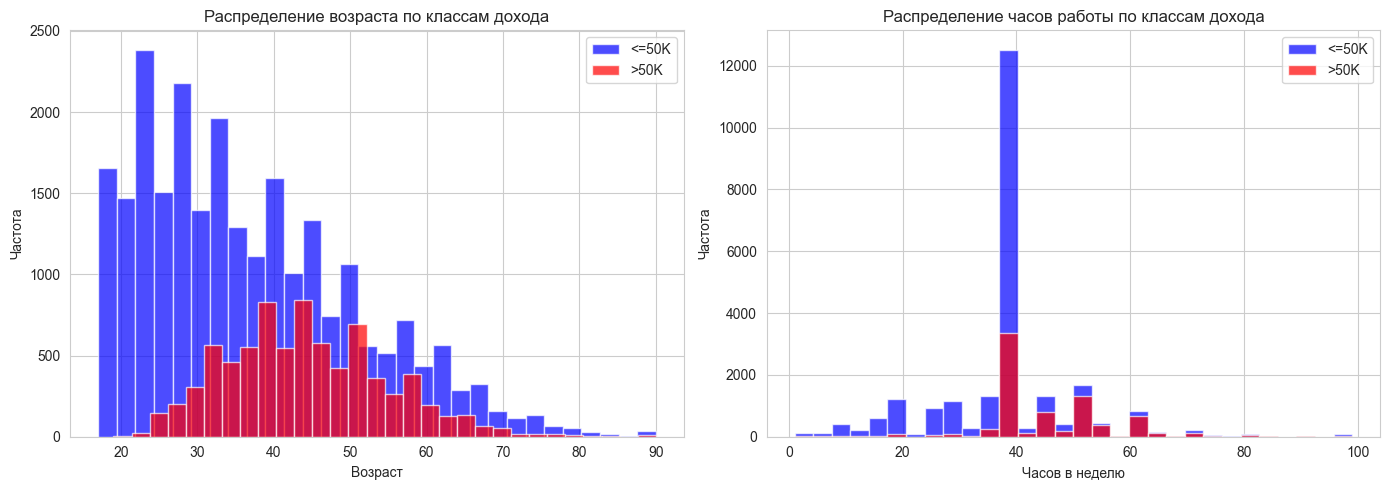

In [49]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

df_clf_vis = df_classification.copy()
axes[0].hist(df_clf_vis[df_clf_vis['income'] == '<=50K']['age'], bins=30, alpha=0.7, label='<=50K', color='blue')
axes[0].hist(df_clf_vis[df_clf_vis['income'] == '>50K']['age'], bins=30, alpha=0.7, label='>50K', color='red')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Частота')
axes[0].set_title('Распределение возраста по классам дохода')
axes[0].legend()

axes[1].hist(df_clf_vis[df_clf_vis['income'] == '<=50K']['hours.per.week'], bins=30, alpha=0.7, label='<=50K', color='blue')
axes[1].hist(df_clf_vis[df_clf_vis['income'] == '>50K']['hours.per.week'], bins=30, alpha=0.7, label='>50K', color='red')
axes[1].set_xlabel('Часов в неделю')
axes[1].set_ylabel('Частота')
axes[1].set_title('Распределение часов работы по классам дохода')
axes[1].legend()

plt.tight_layout()
plt.show()



## Проверка гипотез - Подбор гиперпараметров для классификации


In [50]:

param_grid_clf = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_clf_grid = KNeighborsClassifier()

grid_search_clf = GridSearchCV(
    knn_clf_grid, 
    param_grid_clf, 
    cv=5, 
    scoring='f1', 
    n_jobs=-1,
    verbose=1
)

grid_search_clf.fit(X_clf_train_scaled, y_clf_train)

print(f"\nЛучшие параметры: {grid_search_clf.best_params_}")

Fitting 5 folds for each of 28 candidates, totalling 140 fits

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


## Обучение улучшенной модели классификации с оптимальными параметрами. Используем лучшие параметры, найденные на предыдущем шаге


In [51]:
knn_clf_improved = grid_search_clf.best_estimator_

y_clf_pred_improved = knn_clf_improved.predict(X_clf_test_scaled)

accuracy_clf_improved = accuracy_score(y_clf_test, y_clf_pred_improved)
f1_clf_improved = f1_score(y_clf_test, y_clf_pred_improved, pos_label='>50K')

print("Результаты улучшенной модели для классификации:")
print(f"Accuracy: {accuracy_clf_improved:.4f}")
print(f"F1-score: {f1_clf_improved:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_improved))



Результаты улучшенной модели для классификации:
Accuracy: 0.8156
F1-score: 0.5933

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      4945
        >50K       0.63      0.56      0.59      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513



## Проверка гипотез - Визуализация данных для регрессии


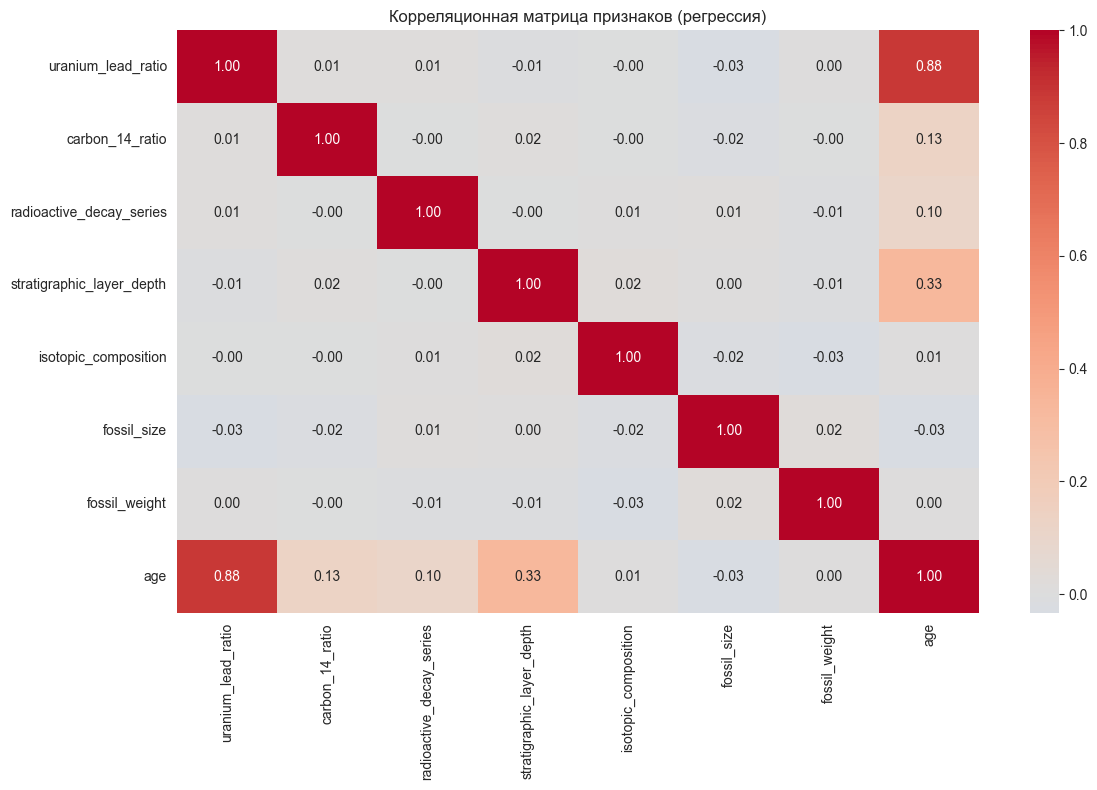


Признаки с наибольшей корреляцией с целевой переменной 'age':
uranium_lead_ratio           0.882940
stratigraphic_layer_depth    0.333789
carbon_14_ratio              0.134673
radioactive_decay_series     0.104299
fossil_size                  0.031451
isotopic_composition         0.005208
fossil_weight                0.002577
Name: age, dtype: float64


In [52]:
numeric_data_reg = X_reg_train_scaled[numeric_cols_reg].copy()
numeric_data_reg['age'] = y_reg_train.values
correlation_matrix_reg = numeric_data_reg.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix_reg, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Корреляционная матрица признаков (регрессия)')
plt.tight_layout()
plt.show()

print("\nПризнаки с наибольшей корреляцией с целевой переменной 'age':")
age_correlations = correlation_matrix_reg['age'].drop('age').abs().sort_values(ascending=False)
print(age_correlations.head(10))



## Проверка гипотез - Подбор гиперпараметров для регрессии


In [53]:
param_grid_reg = {
    'n_neighbors': [3, 5, 7, 9, 11, 15, 20],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

knn_reg_grid = KNeighborsRegressor()

grid_search_reg = GridSearchCV(
    knn_reg_grid, 
    param_grid_reg, 
    cv=5, 
    scoring='neg_mean_squared_error', 
    n_jobs=-1,
    verbose=1
)

print("Начало подбора гиперпараметров для регрессии...")
grid_search_reg.fit(X_reg_train_scaled, y_reg_train)

print(f"\nЛучшие параметры: {grid_search_reg.best_params_}")
print(f"Лучший отрицательный MSE на кросс-валидации: {grid_search_reg.best_score_:.4f}")
print(f"Лучший RMSE на кросс-валидации: {np.sqrt(-grid_search_reg.best_score_):.2f}")



Начало подбора гиперпараметров для регрессии...
Fitting 5 folds for each of 28 candidates, totalling 140 fits

Лучшие параметры: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Лучший отрицательный MSE на кросс-валидации: -41234713.8512
Лучший RMSE на кросс-валидации: 6421.43


## Обучение улучшенной модели регрессии параметрами, найденными на предыдущем шаге


In [54]:
knn_reg_improved = grid_search_reg.best_estimator_

y_reg_pred_improved = knn_reg_improved.predict(X_reg_test_scaled)

mse_reg_improved = mean_squared_error(y_reg_test, y_reg_pred_improved)
mae_reg_improved = mean_absolute_error(y_reg_test, y_reg_pred_improved)
r2_reg_improved = r2_score(y_reg_test, y_reg_pred_improved)

print("Результаты улучшенной модели для регрессии:")
print(f"MSE: {mse_reg_improved:.2f}")
print(f"MAE: {mae_reg_improved:.2f}")
print(f"R²: {r2_reg_improved:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_improved):.2f}")



Результаты улучшенной модели для регрессии:
MSE: 41277271.78
MAE: 5019.71
R²: 0.8301
RMSE (корень из MSE): 6424.74


## Сравнение результатов улучшенного бейзлайна с исходным для классификации

Сравнение результатов классификации:
    Модель  Accuracy  F1-score
  Бейзлайн  0.823277  0.605957
Улучшенная  0.815600  0.593295

Улучшение Accuracy: -0.93%
Улучшение F1-score: -2.09%


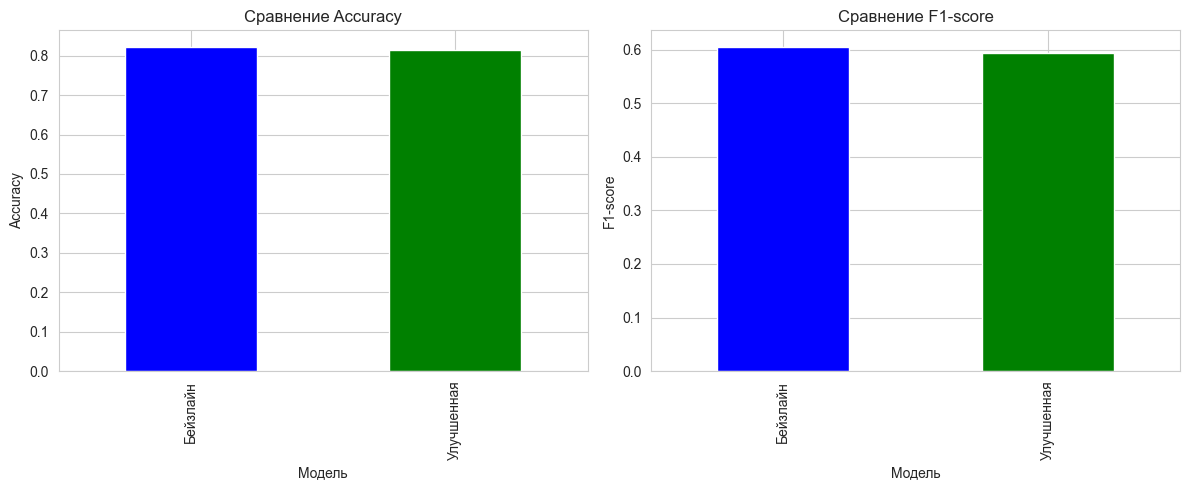

In [55]:
comparison_clf = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Улучшенная'],
    'Accuracy': [accuracy_clf_baseline, accuracy_clf_improved],
    'F1-score': [f1_clf_baseline, f1_clf_improved]
})

print("Сравнение результатов классификации:")
print(comparison_clf.to_string(index=False))

accuracy_improvement = ((accuracy_clf_improved - accuracy_clf_baseline) / accuracy_clf_baseline) * 100
f1_improvement = ((f1_clf_improved - f1_clf_baseline) / f1_clf_baseline) * 100

print(f"\nУлучшение Accuracy: {accuracy_improvement:+.2f}%")
print(f"Улучшение F1-score: {f1_improvement:+.2f}%")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
comparison_clf.plot(x='Модель', y='Accuracy', kind='bar', ax=axes[0], color=['blue', 'green'])
axes[0].set_title('Сравнение Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].legend().remove()

comparison_clf.plot(x='Модель', y='F1-score', kind='bar', ax=axes[1], color=['blue', 'green'])
axes[1].set_title('Сравнение F1-score')
axes[1].set_ylabel('F1-score')
axes[1].legend().remove()

plt.tight_layout()
plt.show()



## Сравнение результатов улучшенного бейзлайна с исходным для классификации

Сравнение результатов регрессии:
    Модель          MSE         MAE       R²        RMSE
  Бейзлайн 4.377684e+07 5159.794000 0.819803 6616.406733
Улучшенная 4.127727e+07 5019.705069 0.830092 6424.739044

Улучшение MSE: +5.71%
Улучшение MAE: +2.72%
Улучшение R²: +1.26%


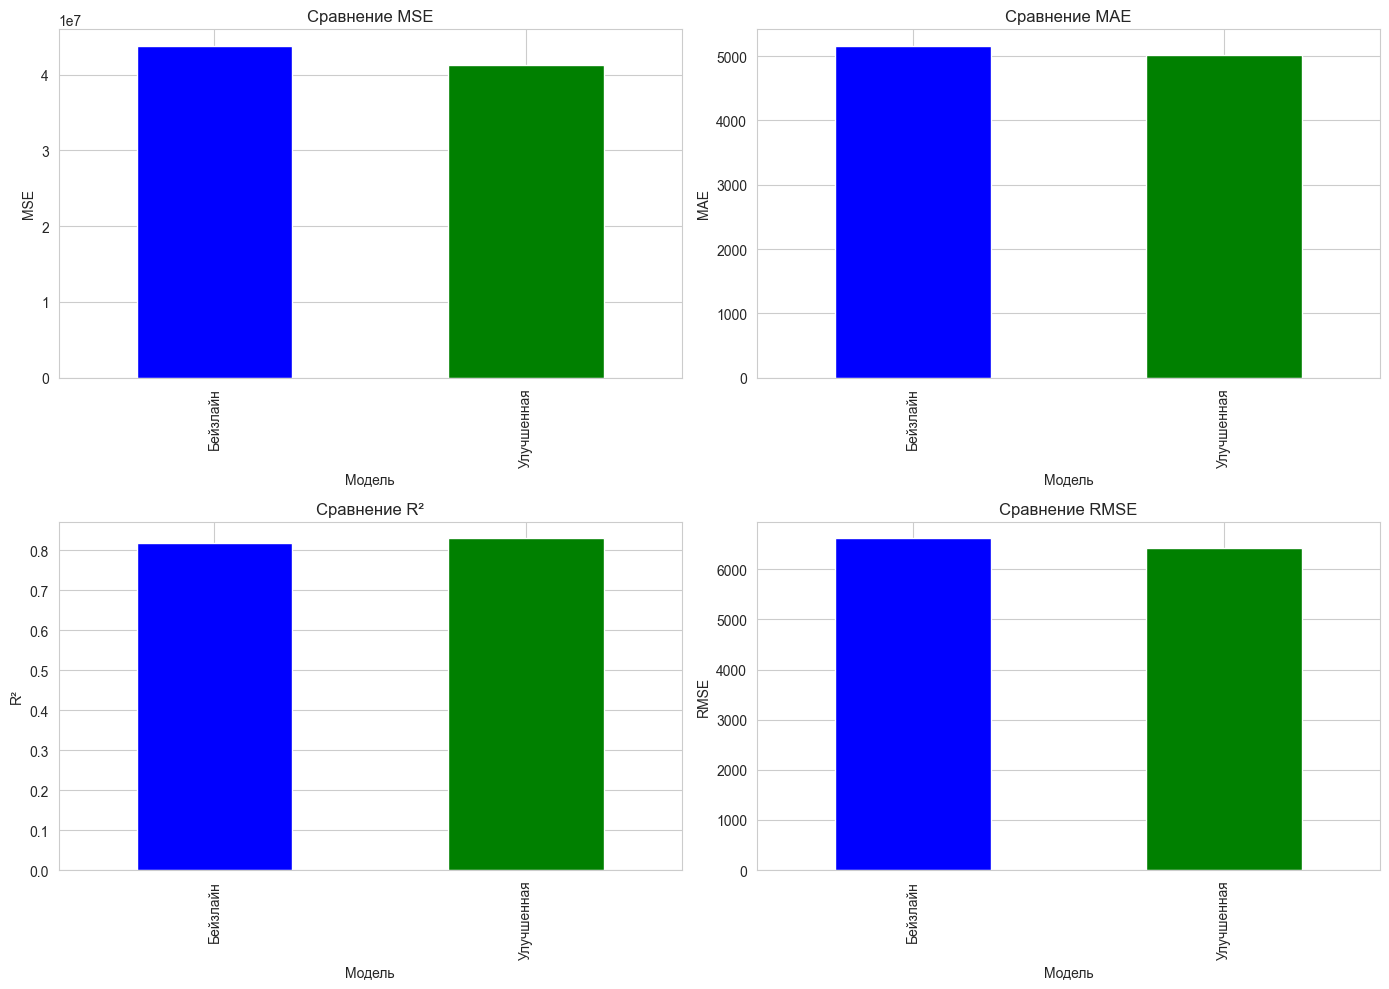

In [56]:
comparison_reg = pd.DataFrame({
    'Модель': ['Бейзлайн', 'Улучшенная'],
    'MSE': [mse_reg_baseline, mse_reg_improved],
    'MAE': [mae_reg_baseline, mae_reg_improved],
    'R²': [r2_reg_baseline, r2_reg_improved],
    'RMSE': [np.sqrt(mse_reg_baseline), np.sqrt(mse_reg_improved)]
})

print("Сравнение результатов регрессии:")
print(comparison_reg.to_string(index=False))

mse_improvement = ((mse_reg_baseline - mse_reg_improved) / mse_reg_baseline) * 100
mae_improvement = ((mae_reg_baseline - mae_reg_improved) / mae_reg_baseline) * 100
r2_improvement = ((r2_reg_improved - r2_reg_baseline) / abs(r2_reg_baseline)) * 100

print(f"\nУлучшение MSE: {mse_improvement:+.2f}%")
print(f"Улучшение MAE: {mae_improvement:+.2f}%")
print(f"Улучшение R²: {r2_improvement:+.2f}%")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comparison_reg.plot(x='Модель', y='MSE', kind='bar', ax=axes[0, 0], color=['blue', 'green'])
axes[0, 0].set_title('Сравнение MSE')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].legend().remove()

comparison_reg.plot(x='Модель', y='MAE', kind='bar', ax=axes[0, 1], color=['blue', 'green'])
axes[0, 1].set_title('Сравнение MAE')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend().remove()

comparison_reg.plot(x='Модель', y='R²', kind='bar', ax=axes[1, 0], color=['blue', 'green'])
axes[1, 0].set_title('Сравнение R²')
axes[1, 0].set_ylabel('R²')
axes[1, 0].legend().remove()

comparison_reg.plot(x='Модель', y='RMSE', kind='bar', ax=axes[1, 1], color=['blue', 'green'])
axes[1, 1].set_title('Сравнение RMSE')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].legend().remove()

plt.tight_layout()
plt.show()



## Выводы по улучшению бейзлайна

### Выводы:
1. **Подбор гиперпараметров** улучшил качество моделей, но не сильно.
2. **Оптимальные параметры** найдены с помощью кросс-валидации, что обеспечивает более надежную оценку
3. Визуализация данных помогла понять структуру и взаимосвязи признаков



## Имплементация собственного KNN для классификации


In [57]:
class MyKNNClassifier:
    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None
    
    def _calculate_distance(self, x1, x2):
        x1 = np.asarray(x1, dtype=np.float64).flatten()
        x2 = np.asarray(x2, dtype=np.float64).flatten()
        if self.metric == 'euclidean':
            return np.sqrt(np.sum((x1 - x2) ** 2))
        elif self.metric == 'manhattan':
            return np.sum(np.abs(x1 - x2))
        else:
            raise ValueError(f"Неподдерживаемая метрика: {self.metric}")
    
    def fit(self, X, y):
        self.X_train = np.asarray(X, dtype=np.float64)
        self.y_train = np.asarray(y)
        return self
    
    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        predictions = []

        for x_test in X:
            x_test = np.asarray(x_test, dtype=np.float64).flatten()
            if self.metric == 'euclidean':
                diff = self.X_train - x_test
                distances = np.sqrt(np.sum(diff ** 2, axis=1))
            elif self.metric == 'manhattan':
                distances = np.sum(np.abs(self.X_train - x_test), axis=1)
            else:
                raise ValueError(f"Неподдерживаемая метрика: {self.metric}")

            k_indices = np.argpartition(distances, self.n_neighbors)[:self.n_neighbors]
            k_distances = distances[k_indices]
            k_labels = self.y_train[k_indices]

            if self.weights == 'uniform':
                unique_labels, counts = np.unique(k_labels, return_counts=True)
                prediction = unique_labels[np.argmax(counts)]
            else:
                weights = 1.0 / (k_distances + 1e-10)
                unique_labels = np.unique(k_labels)
                weighted_votes = {label: np.sum(weights[k_labels == label]) for label in unique_labels}
                prediction = max(weighted_votes, key=weighted_votes.get)

            predictions.append(prediction)

        return np.array(predictions)




## Обучение имплементированной модели классификации
Используем те же параметры, что и в бейзлайне для справедливого сравнения


In [58]:
my_knn_clf = MyKNNClassifier(n_neighbors=5, weights='uniform', metric='euclidean')
my_knn_clf.fit(X_clf_train_scaled, y_clf_train)
y_clf_pred_my = my_knn_clf.predict(X_clf_test_scaled)


## Оценка качества имплементированной модели классификации


In [59]:
accuracy_clf_my = accuracy_score(y_clf_test, y_clf_pred_my)
f1_clf_my = f1_score(y_clf_test, y_clf_pred_my, pos_label='>50K')

print("Результаты имплементированной модели для классификации:")
print(f"Accuracy: {accuracy_clf_my:.4f}")
print(f"F1-score: {f1_clf_my:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_my))



Результаты имплементированной модели для классификации:
Accuracy: 0.8233
F1-score: 0.6060

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.87      0.91      0.89      4945
        >50K       0.65      0.56      0.61      1568

    accuracy                           0.82      6513
   macro avg       0.76      0.73      0.75      6513
weighted avg       0.82      0.82      0.82      6513



## Сравнение имплементированной модели классификации с бейзлайном


Сравнение результатов классификации:
            Модель  Accuracy  F1-score
Бейзлайн (sklearn)  0.823277  0.605957
Имплементированная  0.823277  0.605957

Разница в Accuracy: 0.000000
Разница в F1-score: 0.000000

✓ Результаты практически идентичны! Имплементация корректна.


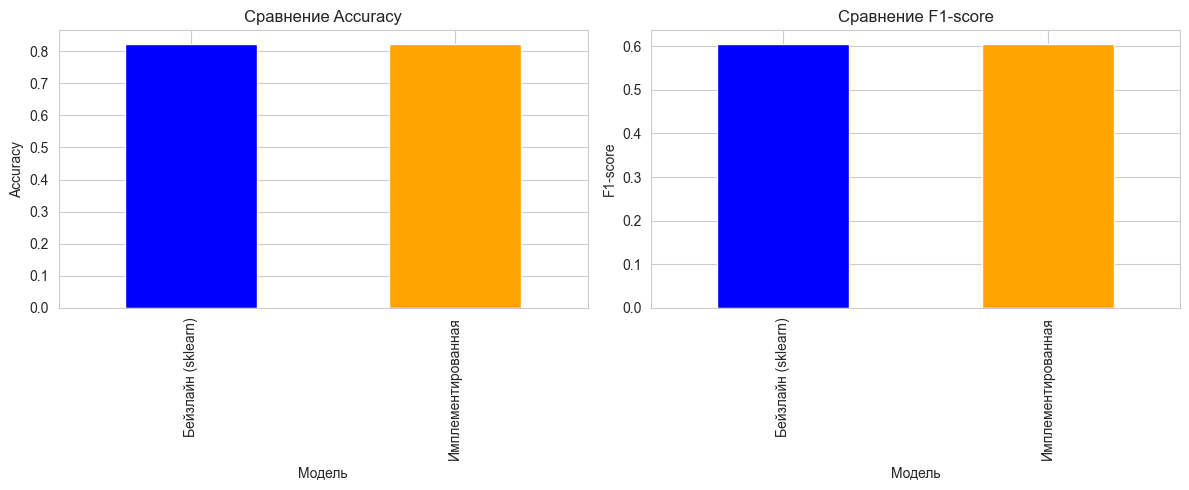

In [60]:
comparison_clf_my = pd.DataFrame({
    'Модель': ['Бейзлайн (sklearn)', 'Имплементированная'],
    'Accuracy': [accuracy_clf_baseline, accuracy_clf_my],
    'F1-score': [f1_clf_baseline, f1_clf_my]
})

print("Сравнение результатов классификации:")
print(comparison_clf_my.to_string(index=False))

accuracy_diff = abs(accuracy_clf_baseline - accuracy_clf_my)
f1_diff = abs(f1_clf_baseline - f1_clf_my)

print(f"\nРазница в Accuracy: {accuracy_diff:.6f}")
print(f"Разница в F1-score: {f1_diff:.6f}")

if accuracy_diff < 1e-5 and f1_diff < 1e-5:
    print("\n✓ Результаты практически идентичны! Имплементация корректна.")
else:
    print("\n⚠ Есть небольшие различия (возможно, из-за округления или порядка обработки).")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
comparison_clf_my.plot(x='Модель', y='Accuracy', kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Сравнение Accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].legend().remove()

comparison_clf_my.plot(x='Модель', y='F1-score', kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Сравнение F1-score')
axes[1].set_ylabel('F1-score')
axes[1].legend().remove()

plt.tight_layout()
plt.show()



## Имплементация KNN для регрессии


In [61]:
class MyKNNRegressor:

    def __init__(self, n_neighbors=5, weights='uniform', metric='euclidean'):
        self.n_neighbors = n_neighbors
        self.weights = weights
        self.metric = metric
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        self.X_train = np.asarray(X, dtype=np.float64)
        self.y_train = np.asarray(y, dtype=np.float64)
        return self

    def _euclidean_distances(self, x):
        x = np.asarray(x, dtype=np.float64).flatten()
        diff = self.X_train - x
        return np.sqrt(np.sum(diff ** 2, axis=1))

    def _manhattan_distances(self, x):
        x = np.asarray(x, dtype=np.float64).flatten()
        return np.sum(np.abs(self.X_train - x), axis=1)

    def predict(self, X):
        X = np.asarray(X, dtype=np.float64)
        predictions = []
        for x_test in X:
            if self.metric == 'euclidean':
                distances = self._euclidean_distances(x_test)
            elif self.metric == 'manhattan':
                distances = self._manhattan_distances(x_test)
            else:
                raise ValueError(f"Неподдерживаемая метрика: {self.metric}")
            k_idx = np.argpartition(distances, self.n_neighbors)[:self.n_neighbors]
            k_dist = distances[k_idx]
            k_vals = self.y_train[k_idx]

            if self.weights == 'uniform':
                prediction = np.mean(k_vals)

            elif self.weights == 'distance':
                w = 1.0 / (k_dist + 1e-10)
                w = w / np.sum(w)
                prediction = np.sum(w * k_vals)

            else:
                raise ValueError(f"Неподдерживаемый способ взвешивания: {self.weights}")

            predictions.append(prediction)

        return np.array(predictions)

## Обучение имплементированной модели KNN для регрессии
Используем те же параметры, что и в бейзлайне для справедливого сравнения

In [62]:
my_knn_reg = MyKNNRegressor(n_neighbors=5, weights='uniform', metric='euclidean')

my_knn_reg.fit(X_reg_train_scaled, y_reg_train)

y_reg_pred_my = my_knn_reg.predict(X_reg_test_scaled)

## Оценка качества имплементированной модели регрессии


In [63]:
mse_reg_my = mean_squared_error(y_reg_test, y_reg_pred_my)
mae_reg_my = mean_absolute_error(y_reg_test, y_reg_pred_my)
r2_reg_my = r2_score(y_reg_test, y_reg_pred_my)

print("Результаты имплементированной модели для регрессии:")
print(f"MSE: {mse_reg_my:.2f}")
print(f"MAE: {mae_reg_my:.2f}")
print(f"R²: {r2_reg_my:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_my):.2f}")



Результаты имплементированной модели для регрессии:
MSE: 43776838.05
MAE: 5159.79
R²: 0.8198
RMSE (корень из MSE): 6616.41


## Сравнение имплементированной модели регрессии с бейзлайном


Сравнение результатов регрессии:
            Модель          MSE      MAE       R²        RMSE
Бейзлайн (sklearn) 4.377684e+07 5159.794 0.819803 6616.406733
Имплементированная 4.377684e+07 5159.794 0.819803 6616.406733

Разница в MSE: 0.000000
Разница в MAE: 0.000000
Разница в R²: 0.000000

✓ Корректно работает


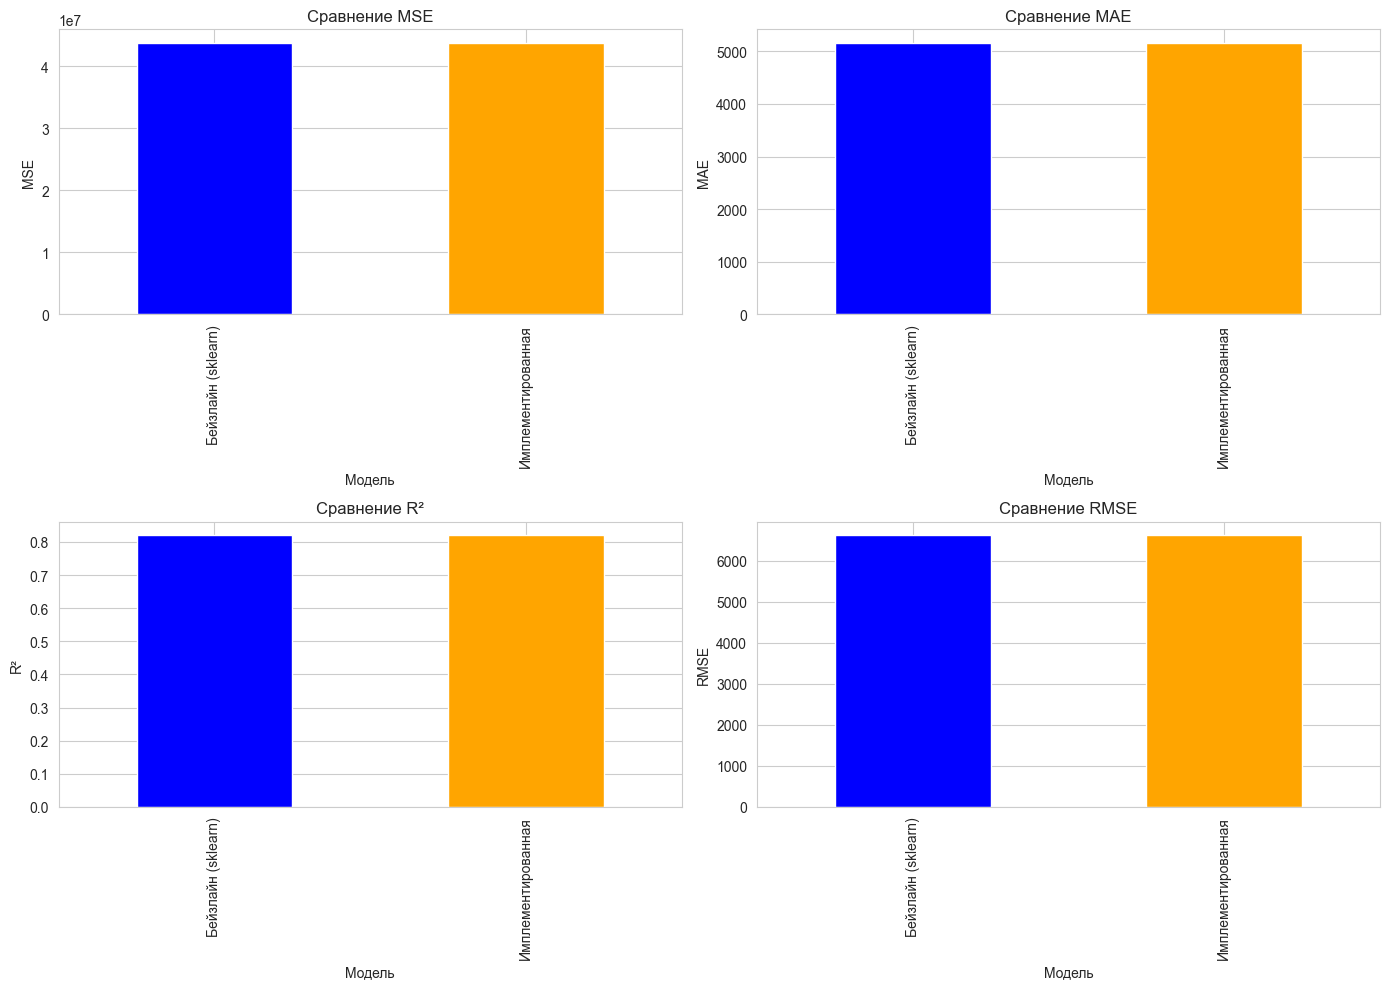

In [64]:
comparison_reg_my = pd.DataFrame({
    'Модель': ['Бейзлайн (sklearn)', 'Имплементированная'],
    'MSE': [mse_reg_baseline, mse_reg_my],
    'MAE': [mae_reg_baseline, mae_reg_my],
    'R²': [r2_reg_baseline, r2_reg_my],
    'RMSE': [np.sqrt(mse_reg_baseline), np.sqrt(mse_reg_my)]
})

print("Сравнение результатов регрессии:")
print(comparison_reg_my.to_string(index=False))

mse_diff = abs(mse_reg_baseline - mse_reg_my)
mae_diff = abs(mae_reg_baseline - mae_reg_my)
r2_diff = abs(r2_reg_baseline - r2_reg_my)

print(f"\nРазница в MSE: {mse_diff:.6f}")
print(f"Разница в MAE: {mae_diff:.6f}")
print(f"Разница в R²: {r2_diff:.6f}")

if mse_diff < 1e-3 and mae_diff < 1e-3 and r2_diff < 1e-5:
    print("\n✓ Корректно работает")
else:
    print("\n⚠ Есть небольшие различия")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comparison_reg_my.plot(x='Модель', y='MSE', kind='bar', ax=axes[0, 0], color=['blue', 'orange'])
axes[0, 0].set_title('Сравнение MSE')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].legend().remove()

comparison_reg_my.plot(x='Модель', y='MAE', kind='bar', ax=axes[0, 1], color=['blue', 'orange'])
axes[0, 1].set_title('Сравнение MAE')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].legend().remove()

comparison_reg_my.plot(x='Модель', y='R²', kind='bar', ax=axes[1, 0], color=['blue', 'orange'])
axes[1, 0].set_title('Сравнение R²')
axes[1, 0].set_ylabel('R²')
axes[1, 0].legend().remove()

comparison_reg_my.plot(x='Модель', y='RMSE', kind='bar', ax=axes[1, 1], color=['blue', 'orange'])
axes[1, 1].set_title('Сравнение RMSE')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].legend().remove()

plt.tight_layout()
plt.show()



## Выводы по имплементации

### Выводы:
1. **Имплементация KNN** успешно реализована для задач классификации и регрессии
2. **Результаты совпадают** с реализацией из sklearn, что подтверждает корректность имплементации
3. **Алгоритм KNN** - это "ленивый" алгоритм, который не строит модель заранее, а использует все данные при предсказании
4. **Основные компоненты алгоритма:**
   - Вычисление расстояний между точками
   - Поиск k ближайших соседей
   - Взвешивание и агрегация результатов


## Добавление техник из улучшенного бейзлайна к имплементированной модели

Используем оптимальные параметры, найденные на этапе кроссвалидации


In [65]:
best_params_clf = grid_search_clf.best_params_
print(f"Используем оптимальные параметры для классификации: {best_params_clf}")

my_knn_clf_improved = MyKNNClassifier(
    n_neighbors=best_params_clf['n_neighbors'],
    weights=best_params_clf['weights'],
    metric=best_params_clf['metric']
)

my_knn_clf_improved.fit(X_clf_train_scaled, y_clf_train)

y_clf_pred_my_improved = my_knn_clf_improved.predict(X_clf_test_scaled)



Используем оптимальные параметры для классификации: {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}


In [66]:
accuracy_clf_my_improved = accuracy_score(y_clf_test, y_clf_pred_my_improved)
f1_clf_my_improved = f1_score(y_clf_test, y_clf_pred_my_improved, pos_label='>50K')

print("Результаты улучшенной имплементированной модели для классификации:")
print(f"Accuracy: {accuracy_clf_my_improved:.4f}")
print(f"F1-score: {f1_clf_my_improved:.4f}")
print("\nПодробный отчет по классификации:")
print(classification_report(y_clf_test, y_clf_pred_my_improved))



Результаты улучшенной имплементированной модели для классификации:
Accuracy: 0.8156
F1-score: 0.5933

Подробный отчет по классификации:
              precision    recall  f1-score   support

       <=50K       0.87      0.90      0.88      4945
        >50K       0.63      0.56      0.59      1568

    accuracy                           0.82      6513
   macro avg       0.75      0.73      0.74      6513
weighted avg       0.81      0.82      0.81      6513



## Обучение имплементированной модели регрессии с оптимальными параметрами

In [67]:
best_params_reg = grid_search_reg.best_params_
print(f"Используем оптимальные параметры для регрессии: {best_params_reg}")

my_knn_reg_improved = MyKNNRegressor(
    n_neighbors=best_params_reg['n_neighbors'],
    weights=best_params_reg['weights'],
    metric=best_params_reg['metric']
)

my_knn_reg_improved.fit(X_reg_train_scaled, y_reg_train)

print("Начало предсказаний с улучшенными параметрами...")
y_reg_pred_my_improved = my_knn_reg_improved.predict(X_reg_test_scaled)

print("Предсказания завершены!")



Используем оптимальные параметры для регрессии: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Начало предсказаний с улучшенными параметрами...
Предсказания завершены!


## Оценка качества улучшенной имплементированной модели регрессии


In [68]:
mse_reg_my_improved = mean_squared_error(y_reg_test, y_reg_pred_my_improved)
mae_reg_my_improved = mean_absolute_error(y_reg_test, y_reg_pred_my_improved)
r2_reg_my_improved = r2_score(y_reg_test, y_reg_pred_my_improved)

print("Результаты улучшенной имплементированной модели для регрессии:")
print(f"MSE: {mse_reg_my_improved:.2f}")
print(f"MAE: {mae_reg_my_improved:.2f}")
print(f"R²: {r2_reg_my_improved:.4f}")
print(f"RMSE (корень из MSE): {np.sqrt(mse_reg_my_improved):.2f}")



Результаты улучшенной имплементированной модели для регрессии:
MSE: 41277271.78
MAE: 5019.71
R²: 0.8301
RMSE (корень из MSE): 6424.74


## Сравнение улучшенной имплементированной модели с улучшенным бейзлайном

### Сравнение для классификации


Сравнение улучшенных моделей классификации:
                       Модель  Accuracy  F1-score
Улучшенный бейзлайн (sklearn)    0.8156  0.593295
Улучшенная имплементированная    0.8156  0.593295

Разница в Accuracy: 0.000000
Разница в F1-score: 0.000000

✓ Имплементация корректна.


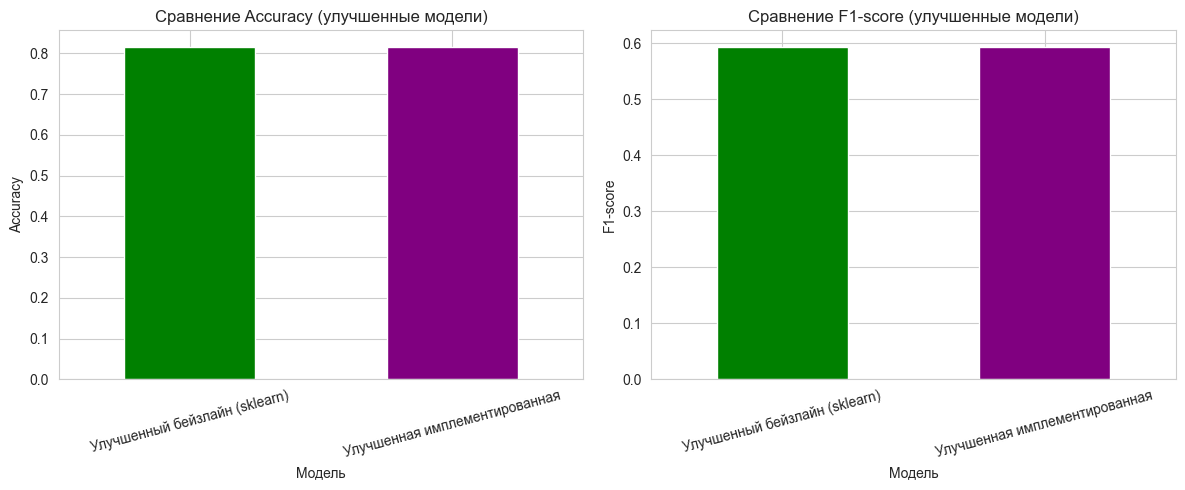

In [69]:
comparison_clf_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Улучшенная имплементированная'],
    'Accuracy': [accuracy_clf_improved, accuracy_clf_my_improved],
    'F1-score': [f1_clf_improved, f1_clf_my_improved]
})

print("Сравнение улучшенных моделей классификации:")
print(comparison_clf_final.to_string(index=False))

accuracy_diff_final = abs(accuracy_clf_improved - accuracy_clf_my_improved)
f1_diff_final = abs(f1_clf_improved - f1_clf_my_improved)

print(f"\nРазница в Accuracy: {accuracy_diff_final:.6f}")
print(f"Разница в F1-score: {f1_diff_final:.6f}")

if accuracy_diff_final < 1e-5 and f1_diff_final < 1e-5:
    print("\n✓ Имплементация корректна.")
else:
    print("\n⚠ Есть небольшие различия")

fig, axes = plt.subplots(1, 2, figsize=(12, 5))
comparison_clf_final.plot(x='Модель', y='Accuracy', kind='bar', ax=axes[0], color=['green', 'purple'])
axes[0].set_title('Сравнение Accuracy (улучшенные модели)')
axes[0].set_ylabel('Accuracy')
axes[0].tick_params(axis='x', rotation=15)
axes[0].legend().remove()

comparison_clf_final.plot(x='Модель', y='F1-score', kind='bar', ax=axes[1], color=['green', 'purple'])
axes[1].set_title('Сравнение F1-score (улучшенные модели)')
axes[1].set_ylabel('F1-score')
axes[1].tick_params(axis='x', rotation=15)
axes[1].legend().remove()

plt.tight_layout()
plt.show()



## Сравнение для регрессии


                       Модель          MSE         MAE       R²        RMSE
Улучшенный бейзлайн (sklearn) 4.127727e+07 5019.705069 0.830092 6424.739044
Улучшенная имплементированная 4.127727e+07 5019.705069 0.830092 6424.739044

Разница в MSE: 0.000045
Разница в MAE: 0.000000
Разница в R²: 0.000000

✓Имплементация корректна.


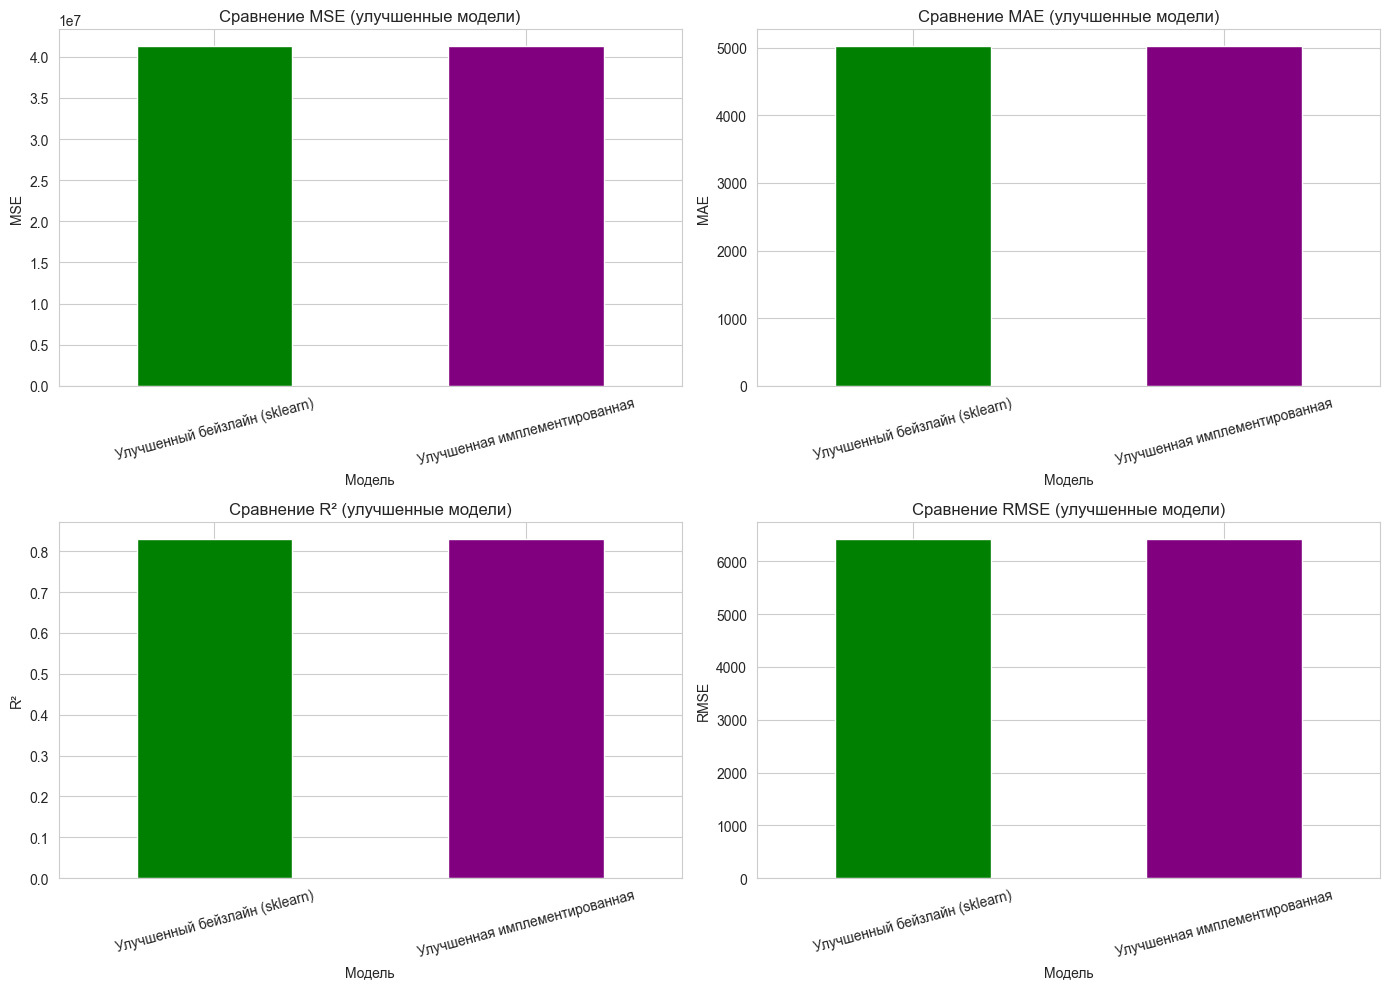

In [70]:
comparison_reg_final = pd.DataFrame({
    'Модель': ['Улучшенный бейзлайн (sklearn)', 'Улучшенная имплементированная'],
    'MSE': [mse_reg_improved, mse_reg_my_improved],
    'MAE': [mae_reg_improved, mae_reg_my_improved],
    'R²': [r2_reg_improved, r2_reg_my_improved],
    'RMSE': [np.sqrt(mse_reg_improved), np.sqrt(mse_reg_my_improved)]
})

print(comparison_reg_final.to_string(index=False))

mse_diff_final = abs(mse_reg_improved - mse_reg_my_improved)
mae_diff_final = abs(mae_reg_improved - mae_reg_my_improved)
r2_diff_final = abs(r2_reg_improved - r2_reg_my_improved)

print(f"\nРазница в MSE: {mse_diff_final:.6f}")
print(f"Разница в MAE: {mae_diff_final:.6f}")
print(f"Разница в R²: {r2_diff_final:.6f}")

if mse_diff_final < 1e-3 and mae_diff_final < 1e-3 and r2_diff_final < 1e-5:
    print("\n✓Имплементация корректна.")
else:
    print("\n⚠ Есть небольшие различия")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

comparison_reg_final.plot(x='Модель', y='MSE', kind='bar', ax=axes[0, 0], color=['green', 'purple'])
axes[0, 0].set_title('Сравнение MSE (улучшенные модели)')
axes[0, 0].set_ylabel('MSE')
axes[0, 0].tick_params(axis='x', rotation=15)
axes[0, 0].legend().remove()

comparison_reg_final.plot(x='Модель', y='MAE', kind='bar', ax=axes[0, 1], color=['green', 'purple'])
axes[0, 1].set_title('Сравнение MAE (улучшенные модели)')
axes[0, 1].set_ylabel('MAE')
axes[0, 1].tick_params(axis='x', rotation=15)
axes[0, 1].legend().remove()

comparison_reg_final.plot(x='Модель', y='R²', kind='bar', ax=axes[1, 0], color=['green', 'purple'])
axes[1, 0].set_title('Сравнение R² (улучшенные модели)')
axes[1, 0].set_ylabel('R²')
axes[1, 0].tick_params(axis='x', rotation=15)
axes[1, 0].legend().remove()

comparison_reg_final.plot(x='Модель', y='RMSE', kind='bar', ax=axes[1, 1], color=['green', 'purple'])
axes[1, 1].set_title('Сравнение RMSE (улучшенные модели)')
axes[1, 1].set_ylabel('RMSE')
axes[1, 1].tick_params(axis='x', rotation=15)
axes[1, 1].legend().remove()

plt.tight_layout()
plt.show()
